# Youtube Text Report

## Author: Tovin McVay Jr

### Overview

The idea of this project is to really take a look and analyze what peoples thoughts are on getting vaccninated. As we know we are in a pandemic where we have had a huge rise in cased for the last year, and pharmacudical companies have potentially created a vaccine for COVID-19. With that being announced we can assume many people have mixed thoughts on the vaccine such as it being produced so quickly, or how effective it, and the morst important of them all, is it even safe? and so in the dataset I have, it is a collection of comments from youtube from a news video on the vaccine being out. I analyzed the comments that were left for the video on what peoples thoughts are about the whole vaccine being out and seeing if there are more positve or negative comments. The way I will be analyzing the comments is by calculating the value of how positve, negative, or nuetral the comments. The way that this can be determined is by a tool called Vader Sentiment. 


VADER which stands for "Valence Aware Dictionary and sEntiment Reasoner" is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features, basically words which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the positivity and pegativity score but also tells us about how positive or negative a sentiment is.

Why Sentiment Analysis?


Well this is the process of computationally determing whether a comment, quote, writing, and more is positve, negative, or nuetral as said earlier. It is also known as "opinion mining" where we can derive the opnion or attitude of the person who make the comment. Its very helpful in the marketing field to get an idea of what user thoughts are on product, company, and etc. Companies can use this tool to figure out what people think of their company and if its more so a negative aspect, companies then figure out what to do go forward to receive more of a positive sentiment for the future, same for politics same strategies apply for a campaign team as well.

Data used:


Pandas


Vader


Matplotlib


Natural Language Tool Kit(NLTK)


In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings

In [3]:
yt_vac = pd.read_csv('YouTubeVaccination_Dec14-Dec26_2021_fixed.csv')
yt_vac.keys()

Index(['Date', 'Title', 'Url', 'Domain', 'Page Type', 'Language', 'Author',
       'Full Name', 'Full Text', 'Original Url', 'Thread Entry Type',
       'Page Type Name', 'Pub Type'],
      dtype='object')

In [4]:
en_only = yt_vac.loc[yt_vac['Language'] == 'en']
en_only

,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,Original Url,Thread Entry Type,Page Type Name,Pub Type
0,12/26/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=sT80A5uPREolc=...,youtube.com,youtube,en,RJ MacReady,RJ MacReady,"I got the Moderna vaccine, hereâ€™s my list of...",https://www.youtube.com/watch?v=sT80A5uPREolc=...,reply,YouTube,VCOMMENT
1,12/26/2020 23:36,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,@Charlotte Haggerty Do you really believe ever...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
2,12/26/2020 23:34,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,Salavin,Salavin,"I hate it when they say ""You don't want a covi...",https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,reply,YouTube,VCOMMENT
3,12/26/2020 23:30,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,"@Sweet Heart Well, Quantas, an Australian airl...",https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
4,12/26/2020 23:27,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,youtube.com,youtube,en,Kristi Allman,Kristi Allman,@AngryAngy Here they recommend a flu shot duri...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,reply,YouTube,VCOMMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,12/13/2020 0:12,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=JMEK0-zO...,youtube.com,youtube,en,Sarah Wales,NaN,Pfizer - The most fined Corporation in the US ...,http://www.youtube.com/all_comments?v=JMEK0-zO...,reply,YouTube,VCOMMENT
12487,12/13/2020 0:11,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,youtube.com,youtube,en,Damoreah Mitchell,NaN,How is this women the first person to get the ...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,reply,YouTube,VCOMMENT
12488,12/13/2020 0:07,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=XWG_Jypo...,youtube.com,youtube,en,Adelaide Hemlock,NaN,Breast cancer survivor: good question! Iâ€™ve ...,http://www.youtube.com/all_comments?v=XWG_Jypo...,reply,YouTube,VCOMMENT
12489,12/13/2020 0:02,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=tG7CzK5J...,youtube.com,youtube,en,Flumazenil,NaN,Panel members first to get the vaccine.,http://www.youtube.com/all_comments?v=tG7CzK5J...,reply,YouTube,VCOMMENT


In [5]:
yt_vac['Full Text'].reset_index()

,index,Full Text
0,0,"I got the Moderna vaccine, hereâ€™s my list of..."
1,1,@Charlotte Haggerty Do you really believe ever...
2,2,"I hate it when they say ""You don't want a covi..."
3,3,"@Sweet Heart Well, Quantas, an Australian airl..."
4,4,@AngryAngy Here they recommend a flu shot duri...
...,...,...
12486,12486,Pfizer - The most fined Corporation in the US ...
12487,12487,How is this women the first person to get the ...
12488,12488,Breast cancer survivor: good question! Iâ€™ve ...
12489,12489,Panel members first to get the vaccine.


In [6]:
yt_vac["Full Text"][3]

"@Sweet Heart Well, Quantas, an Australian airline, has already made it that no one can fly with them unless they have a stamp on their passport showing that they got the vaccine. What will be next? Maybe a tattoo on your hand. Look, China is already doing this with their citizens, controlling all their moves. You do something wrong, you get a strike, meaning that you won't be allowed in a supermarket, or public places, or in an airport. The vaccine is just one step to get there where they (the U.N. and their 2030 agenda....look it up) want you."

Lines 3-5 

In these I am loading in my data and looking over the comments seeing that people have been saying about the vaccine.

In [7]:
analyser = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

In [8]:
print(yt_vac['Full Text'][:10])
print(analyser.polarity_scores(yt_vac['Full Text'][:10]))

0    I got the Moderna vaccine, hereâ€™s my list of...
1    @Charlotte Haggerty Do you really believe ever...
2    I hate it when they say "You don't want a covi...
3    @Sweet Heart Well, Quantas, an Australian airl...
4    @AngryAngy Here they recommend a flu shot duri...
5    We don't need a Corona vaccine, we need a come...
6    I had no idea of who this guy was prior to thi...
7    @AngryAngy ZERO medical test is done before se...
8    @Justin Kirschenman I don't know about your lo...
9    Remember when the French scientist said test a...
Name: Full Text, dtype: object
{'neg': 0.092, 'neu': 0.79, 'pos': 0.118, 'compound': 0.9435}


In [9]:
yt_vac['vader_scores'] = [analyser.polarity_scores(x) for x in en_only['Full Text']]
yt_vac['vader_scores'].head(20).reset_index()

,index,vader_scores
0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2,"{'neg': 0.076, 'neu': 0.728, 'pos': 0.196, 'co..."
3,3,"{'neg': 0.06, 'neu': 0.817, 'pos': 0.123, 'com..."
4,4,"{'neg': 0.105, 'neu': 0.792, 'pos': 0.103, 'co..."
5,5,"{'neg': 0.0, 'neu': 0.949, 'pos': 0.051, 'comp..."
6,6,"{'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'comp..."
7,7,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp..."
8,8,"{'neg': 0.036, 'neu': 0.811, 'pos': 0.154, 'co..."
9,9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [10]:
yt_vac['pos'] = [x['pos'] for x in yt_vac['vader_scores']]
yt_vac['pos']

0        0.000
1        0.000
2        0.196
3        0.123
4        0.103
         ...  
12486    0.127
12487    0.131
12488    0.178
12489    0.000
12490    0.000
Name: pos, Length: 12491, dtype: float64

In [11]:
yt_vac['neg'] = [x['neg']for x in yt_vac['vader_scores']]
yt_vac['neg'].reset_index()

,index,neg
0,0,0.000
1,1,0.000
2,2,0.076
3,3,0.060
4,4,0.105
...,...,...
12486,12486,0.229
12487,12487,0.000
12488,12488,0.271
12489,12489,0.000


Lines 6 - 9

In these I am running a vader polarity test to see what these comments are being considered either postive, negative or neutral. From the numbers we see that most of the comments are high in being neutral looking in line 8, the 'neu' stands for neutral and we see that is has the higher number than pos or neg. So we can assume most people feel no type of way about the vaccine.

In [12]:
from matplotlib import pyplot as plt

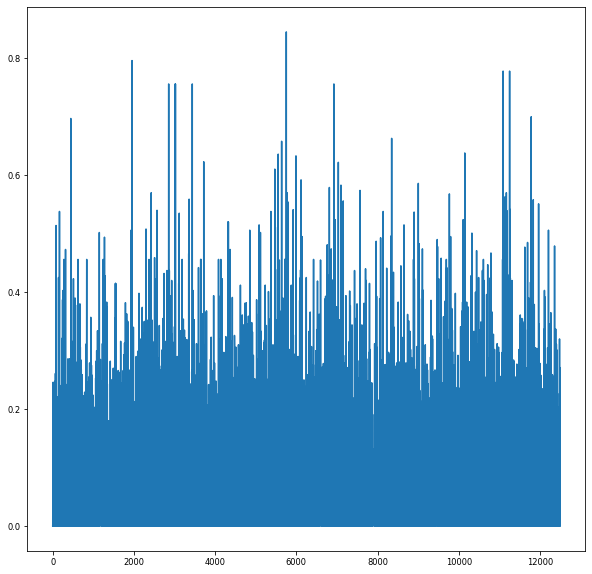

In [13]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(yt_vac['neg'])
plt.yticks(fontsize = 'small')
plt.xticks(fontsize = 'small')
plt.show()

# Conclusion

So we can see that most of the comments had more a negative to neutral sentiment in regards to the vaccnine. I find myself pretty surpised that there were that many negative things said about a vaccine getting out with the fact of us still in a pandemic and know that majority of people want to be back in a normal setting again.

Here is the graph that is showing the number of comments with a neutral sentiment.

For this portion of the project I am using a library tool called nltk, it is short for "Natural Language Toolkit". This tool is used in working in computational linguistics, it guides the reader through the fundamentals of writing Python programs, working with corpora, categorizing text, analyzing linguistic structure, and more.
The Tokenzing is a way to seperate words in a sentence using the most common delimeter "," , for example lets say you are analyzing a long sentence and you want to brake it up word by word to see what words, phrases, and more are in the sentence this is what make nltk a resource fool tool when playing with a huge dataset.

In [14]:
import nltk
from nltk import tokenize as tk
from nltk import FreqDist
from nltk.corpus import stopwords
import matplotlib
import string
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/tjmcvay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tjmcvay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
en_only['text_lower'] = [x.lower() for x in en_only['Full Text']]
en_only['text_lower'].head(20)

0     i got the moderna vaccine, hereâ€™s my list of...
1     @charlotte haggerty do you really believe ever...
2     i hate it when they say "you don't want a covi...
3     @sweet heart well, quantas, an australian airl...
4     @angryangy here they recommend a flu shot duri...
5     we don't need a corona vaccine, we need a come...
6     i had no idea of who this guy was prior to thi...
7     @angryangy zero medical test is done before se...
8     @justin kirschenman i don't know about your lo...
9     remember when the french scientist said test a...
10    @angryangy i've only said to limit vaccines an...
11    use your brain please , samiitb so many people...
12    @krish soni , i am assuming that english isn't...
13    the south african variant is the one to keep y...
14                part of the satan gates vaccine club!
15    enough of the lies already. it is patently rid...
16    @angryangy america has a different schedule. a...
17    i love the jre, but joe is pretty careless

In [16]:
yt_vac['tokens'] = [tk.word_tokenize(x) for x in yt_vac['Full Text']]
yt_vac['tokens'].head(5)

0    [I, got, the, Moderna, vaccine, ,, hereâ€™s, m...
1    [@, Charlotte, Haggerty, Do, you, really, beli...
2    [I, hate, it, when, they, say, ``, You, do, n'...
3    [@, Sweet, Heart, Well, ,, Quantas, ,, an, Aus...
4    [@, AngryAngy, Here, they, recommend, a, flu, ...
Name: tokens, dtype: object

As I did before I loaded in the comment from the data set and i decided to make looking at a lot of sentence easier by making all of the words all lower case and then just showed the first 5 rows in the dataset.

In [17]:
yt_vac['tokens'][2]

['I',
 'hate',
 'it',
 'when',
 'they',
 'say',
 '``',
 'You',
 'do',
 "n't",
 'want',
 'a',
 'covid',
 'vaccine',
 '?',
 'Well',
 ',',
 'it',
 'worked',
 'for',
 'smallpox',
 'and',
 'polio',
 '!',
 '!',
 '!',
 "''",
 '.',
 'Yeah',
 'but',
 'here',
 "'s",
 'the',
 'difference',
 ':',
 'covid',
 'is',
 "n't",
 'even',
 '0.1',
 '%',
 'as',
 'deadly',
 'as',
 'smallpox',
 'for',
 'example',
 '.',
 'That',
 "'s",
 'my',
 'issue',
 'with',
 'it',
 '.',
 'I',
 "'m",
 'definitely',
 'not',
 'against',
 'vaccines',
 ',',
 'it',
 'would',
 'be',
 'stupid',
 'to',
 'be',
 'against',
 'such',
 'a',
 'great',
 'advancement',
 'of',
 'mankind',
 '.',
 'But',
 'should',
 'we',
 'vaccinate',
 'ourselves',
 'against',
 'everything',
 '?',
 'I',
 'mean',
 'cmon',
 '...',
 'I',
 'support',
 'covid',
 'vaccinations',
 'for',
 'people',
 'older',
 'than',
 '65',
 'etc',
 'but',
 'definitely',
 'not',
 'for',
 'people',
 'between',
 'the',
 'ages',
 'of',
 '0-35',
 '...']

Here above is me using the tokenizing tool for the 3 sentence in the row, and we can see how they are seperated word by word with a comma breaking each word up. We can see that it wont show me the whole sentence since its a pretty long one.

Lines 13-15

Here I loaded in the data for it to be tokenized and so I chose the 3rd element to tokenized.

In [18]:
len(stopwords.words('english'))

179

In [19]:
mystopwords = stopwords.words('english')
mystopwords.append("'.")
mystopwords.append("'s")
len(mystopwords)

181

Here I wanted to figure out how many stopwords were in the entire comments section. A stopword is a commonly used word such as "the", "a", "an", and etc that search engines tend to be programmed to ignore. When using this tool there is a way to get rid of all of those stopwords to help cut down the amount of words in the dataset but for this instance I just want to know how my stopwards have been recognized. and we see that nltk found 179 which is just more of an guess because there are many words that are considered stopwords so the tool did its best to identify how many there were.

Now in the line following it, I decided to specify what stopwards I wanted to be identified and I chose the "." and "'s", as I mentioned before there tons of stopwards that can considered so we see the total for both of those are 181.

In [20]:
filtered = []
for i in yt_vac['tokens']:
    filtered.append([word for word in i if word not in mystopwords])
    
yt_vac['filtered'] = filtered

In [21]:
yt_vac['filtered'][2]

['I',
 'hate',
 'say',
 '``',
 'You',
 "n't",
 'want',
 'covid',
 'vaccine',
 '?',
 'Well',
 ',',
 'worked',
 'smallpox',
 'polio',
 '!',
 '!',
 '!',
 "''",
 '.',
 'Yeah',
 'difference',
 ':',
 'covid',
 "n't",
 'even',
 '0.1',
 '%',
 'deadly',
 'smallpox',
 'example',
 '.',
 'That',
 'issue',
 '.',
 'I',
 "'m",
 'definitely',
 'vaccines',
 ',',
 'would',
 'stupid',
 'great',
 'advancement',
 'mankind',
 '.',
 'But',
 'vaccinate',
 'everything',
 '?',
 'I',
 'mean',
 'cmon',
 '...',
 'I',
 'support',
 'covid',
 'vaccinations',
 'people',
 'older',
 '65',
 'etc',
 'definitely',
 'people',
 'ages',
 '0-35',
 '...']

Here I created a function where I implemented a way for python to filter out the two certain stopwords I chose out of all of the comments in the dataset.

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
no_punct = []
for i in yt_vac['filtered']:
    no_punct.append([word for word in i if word not in string.punctuation])

In [24]:
yt_vac['no_punct'] = no_punct
yt_vac['no_punct'][2]

['I',
 'hate',
 'say',
 '``',
 'You',
 "n't",
 'want',
 'covid',
 'vaccine',
 'Well',
 'worked',
 'smallpox',
 'polio',
 "''",
 'Yeah',
 'difference',
 'covid',
 "n't",
 'even',
 '0.1',
 'deadly',
 'smallpox',
 'example',
 'That',
 'issue',
 'I',
 "'m",
 'definitely',
 'vaccines',
 'would',
 'stupid',
 'great',
 'advancement',
 'mankind',
 'But',
 'vaccinate',
 'everything',
 'I',
 'mean',
 'cmon',
 '...',
 'I',
 'support',
 'covid',
 'vaccinations',
 'people',
 'older',
 '65',
 'etc',
 'definitely',
 'people',
 'ages',
 '0-35',
 '...']

Lines 18 - 22

Here I am filtering out any string punctuation that is found in any of the comments.

In [25]:
freq1 = [FreqDist(x) for x in yt_vac['no_punct']]
yt_vac['freqs1'] = freq1
yt_vac['freqs1']

0        {'I': 1, 'got': 1, 'Moderna': 1, 'vaccine': 1,...
1        {'Charlotte': 1, 'Haggerty': 1, 'Do': 1, 'real...
2        {'I': 4, 'hate': 1, 'say': 1, '``': 1, 'You': ...
3        {'Sweet': 1, 'Heart': 1, 'Well': 1, 'Quantas':...
4        {'AngryAngy': 1, 'Here': 1, 'recommend': 1, 'f...
                               ...                        
12486    {'Pfizer': 1, 'The': 1, 'fined': 1, 'Corporati...
12487    {'How': 2, 'women': 1, 'first': 3, 'person': 2...
12488    {'Breast': 1, 'cancer': 1, 'survivor': 1, 'goo...
12489    {'Panel': 1, 'members': 1, 'first': 1, 'get': ...
12490    {'Tom': 1, 'R': 1, 'It': 2, 'wo': 1, 'n't': 1,...
Name: freqs1, Length: 12491, dtype: object

Above I plemented a function to count the frequency of each word that has been used in the whole comment section.

In [26]:
A = Counter(yt_vac['freqs1'][0])
B = Counter(yt_vac['freqs1'][2])
A + B

Counter({'I': 5,
         'got': 1,
         'Moderna': 1,
         'vaccine': 2,
         'hereâ€™s': 1,
         'list': 1,
         'side': 1,
         'effects': 1,
         'https': 1,
         '//youtu.be/9sWYGYNuJAo': 1,
         'hate': 1,
         'say': 1,
         '``': 1,
         'You': 1,
         "n't": 2,
         'want': 1,
         'covid': 3,
         'Well': 1,
         'worked': 1,
         'smallpox': 2,
         'polio': 1,
         "''": 1,
         'Yeah': 1,
         'difference': 1,
         'even': 1,
         '0.1': 1,
         'deadly': 1,
         'example': 1,
         'That': 1,
         'issue': 1,
         "'m": 1,
         'definitely': 2,
         'vaccines': 1,
         'would': 1,
         'stupid': 1,
         'great': 1,
         'advancement': 1,
         'mankind': 1,
         'But': 1,
         'vaccinate': 1,
         'everything': 1,
         'mean': 1,
         'cmon': 1,
         '...': 2,
         'support': 1,
         'vaccinations': 1

In the example above I took the first two comments in the column and found the frequency of how many times each word has been used in both of those sentences. We can see most only use the word once but the greatest word that has been used in both comment is "I" which totaled 5.

In [27]:
yt_vac['f1_counts'] = [Counter(x) for x in yt_vac['freqs1']]
yt_vac['f1_counts'][2]

Counter({'I': 4,
         'hate': 1,
         'say': 1,
         '``': 1,
         'You': 1,
         "n't": 2,
         'want': 1,
         'covid': 3,
         'vaccine': 1,
         'Well': 1,
         'worked': 1,
         'smallpox': 2,
         'polio': 1,
         "''": 1,
         'Yeah': 1,
         'difference': 1,
         'even': 1,
         '0.1': 1,
         'deadly': 1,
         'example': 1,
         'That': 1,
         'issue': 1,
         "'m": 1,
         'definitely': 2,
         'vaccines': 1,
         'would': 1,
         'stupid': 1,
         'great': 1,
         'advancement': 1,
         'mankind': 1,
         'But': 1,
         'vaccinate': 1,
         'everything': 1,
         'mean': 1,
         'cmon': 1,
         '...': 2,
         'support': 1,
         'vaccinations': 1,
         'people': 2,
         'older': 1,
         '65': 1,
         'etc': 1,
         'ages': 1,
         '0-35': 1})

Above is another function that counts the amount of words used over again in each sentence.

In [28]:
wordcounts = Counter()
for i in yt_vac['f1_counts']:
    wordcounts += i

Above is the loop to count the number of words.

In [29]:
len(wordcounts)

39806

Total number of words 

In [30]:
type(wordcounts)

collections.Counter

In [40]:
 dict1 = dict(wordcounts)
 #dict1

I decided to comment out the section above because it was going to generate the total words in the dataset and count how many times there were said until I organize the dataset using pandas.

In [32]:
counts = pd.DataFrame.from_dict(dict(wordcounts), orient ='index')
counts

,0
I,6886
got,667
Moderna,273
vaccine,15647
hereâ€™s,9
...,...
Hindi,1
Urdu,1
œðŸ,1
libel,1


In [33]:
counts = counts.rename(columns = {0: 'counts'})
counts

,counts
I,6886
got,667
Moderna,273
vaccine,15647
hereâ€™s,9
...,...
Hindi,1
Urdu,1
œðŸ,1
libel,1


In [34]:
count_sort = counts.sort_values('counts', ascending = False)[:40]
count_sort

,counts
vaccine,15647
I,6886
The,4863
people,4499
https,4469
n't,4175
``,2989
'',2969
get,2850
take,2585


From the three tables above shows the total number times each word was said in all of the sentences from the comments section we see vaccine is said the most with a total of 15,647 times.

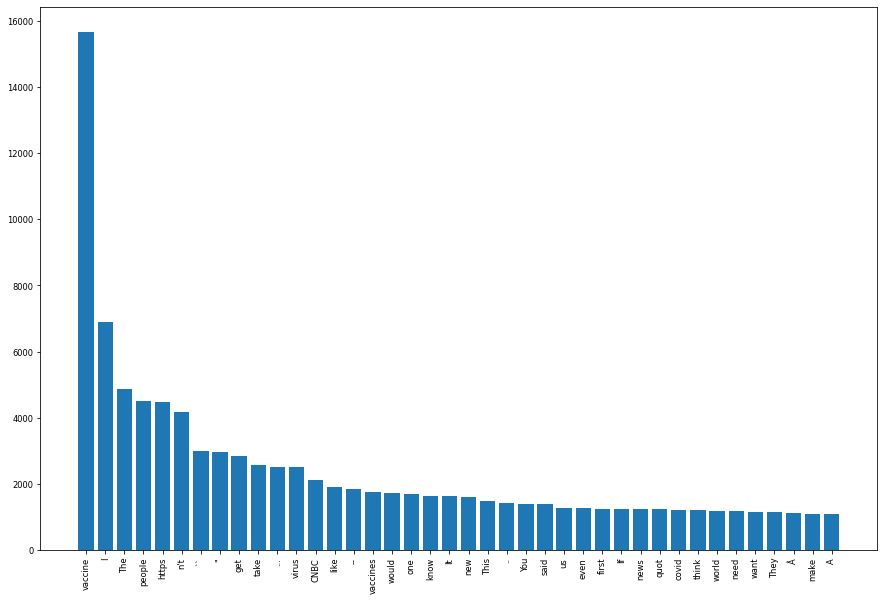

In [35]:
fig, ax0 = plt.subplots(figsize=(15,10))
ax0.bar(count_sort.index, count_sort['counts'])
plt.xticks(rotation=90, fontsize = 'small')
plt.yticks(fontsize = 'small')
plt.show()

Above is just a graph to display the top most used words.

## Conclusion

To conclude with NLTK we see that vaccine was said the most which is not surprising since this whole dataset is about the vaccine being released to the public and these are all of users thoghts on the idea of the vaccine.